<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [444]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [445]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [446]:
# A:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [447]:
X.shape

(506, 13)

In [448]:
X['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [449]:
X['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [450]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [451]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [452]:
y=pd.DataFrame(y,columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [453]:
y.shape

(506, 1)

In [454]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [455]:
# A:
combined=pd.concat([X,y],axis=1)
combined.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [456]:
combined.shape

(506, 14)

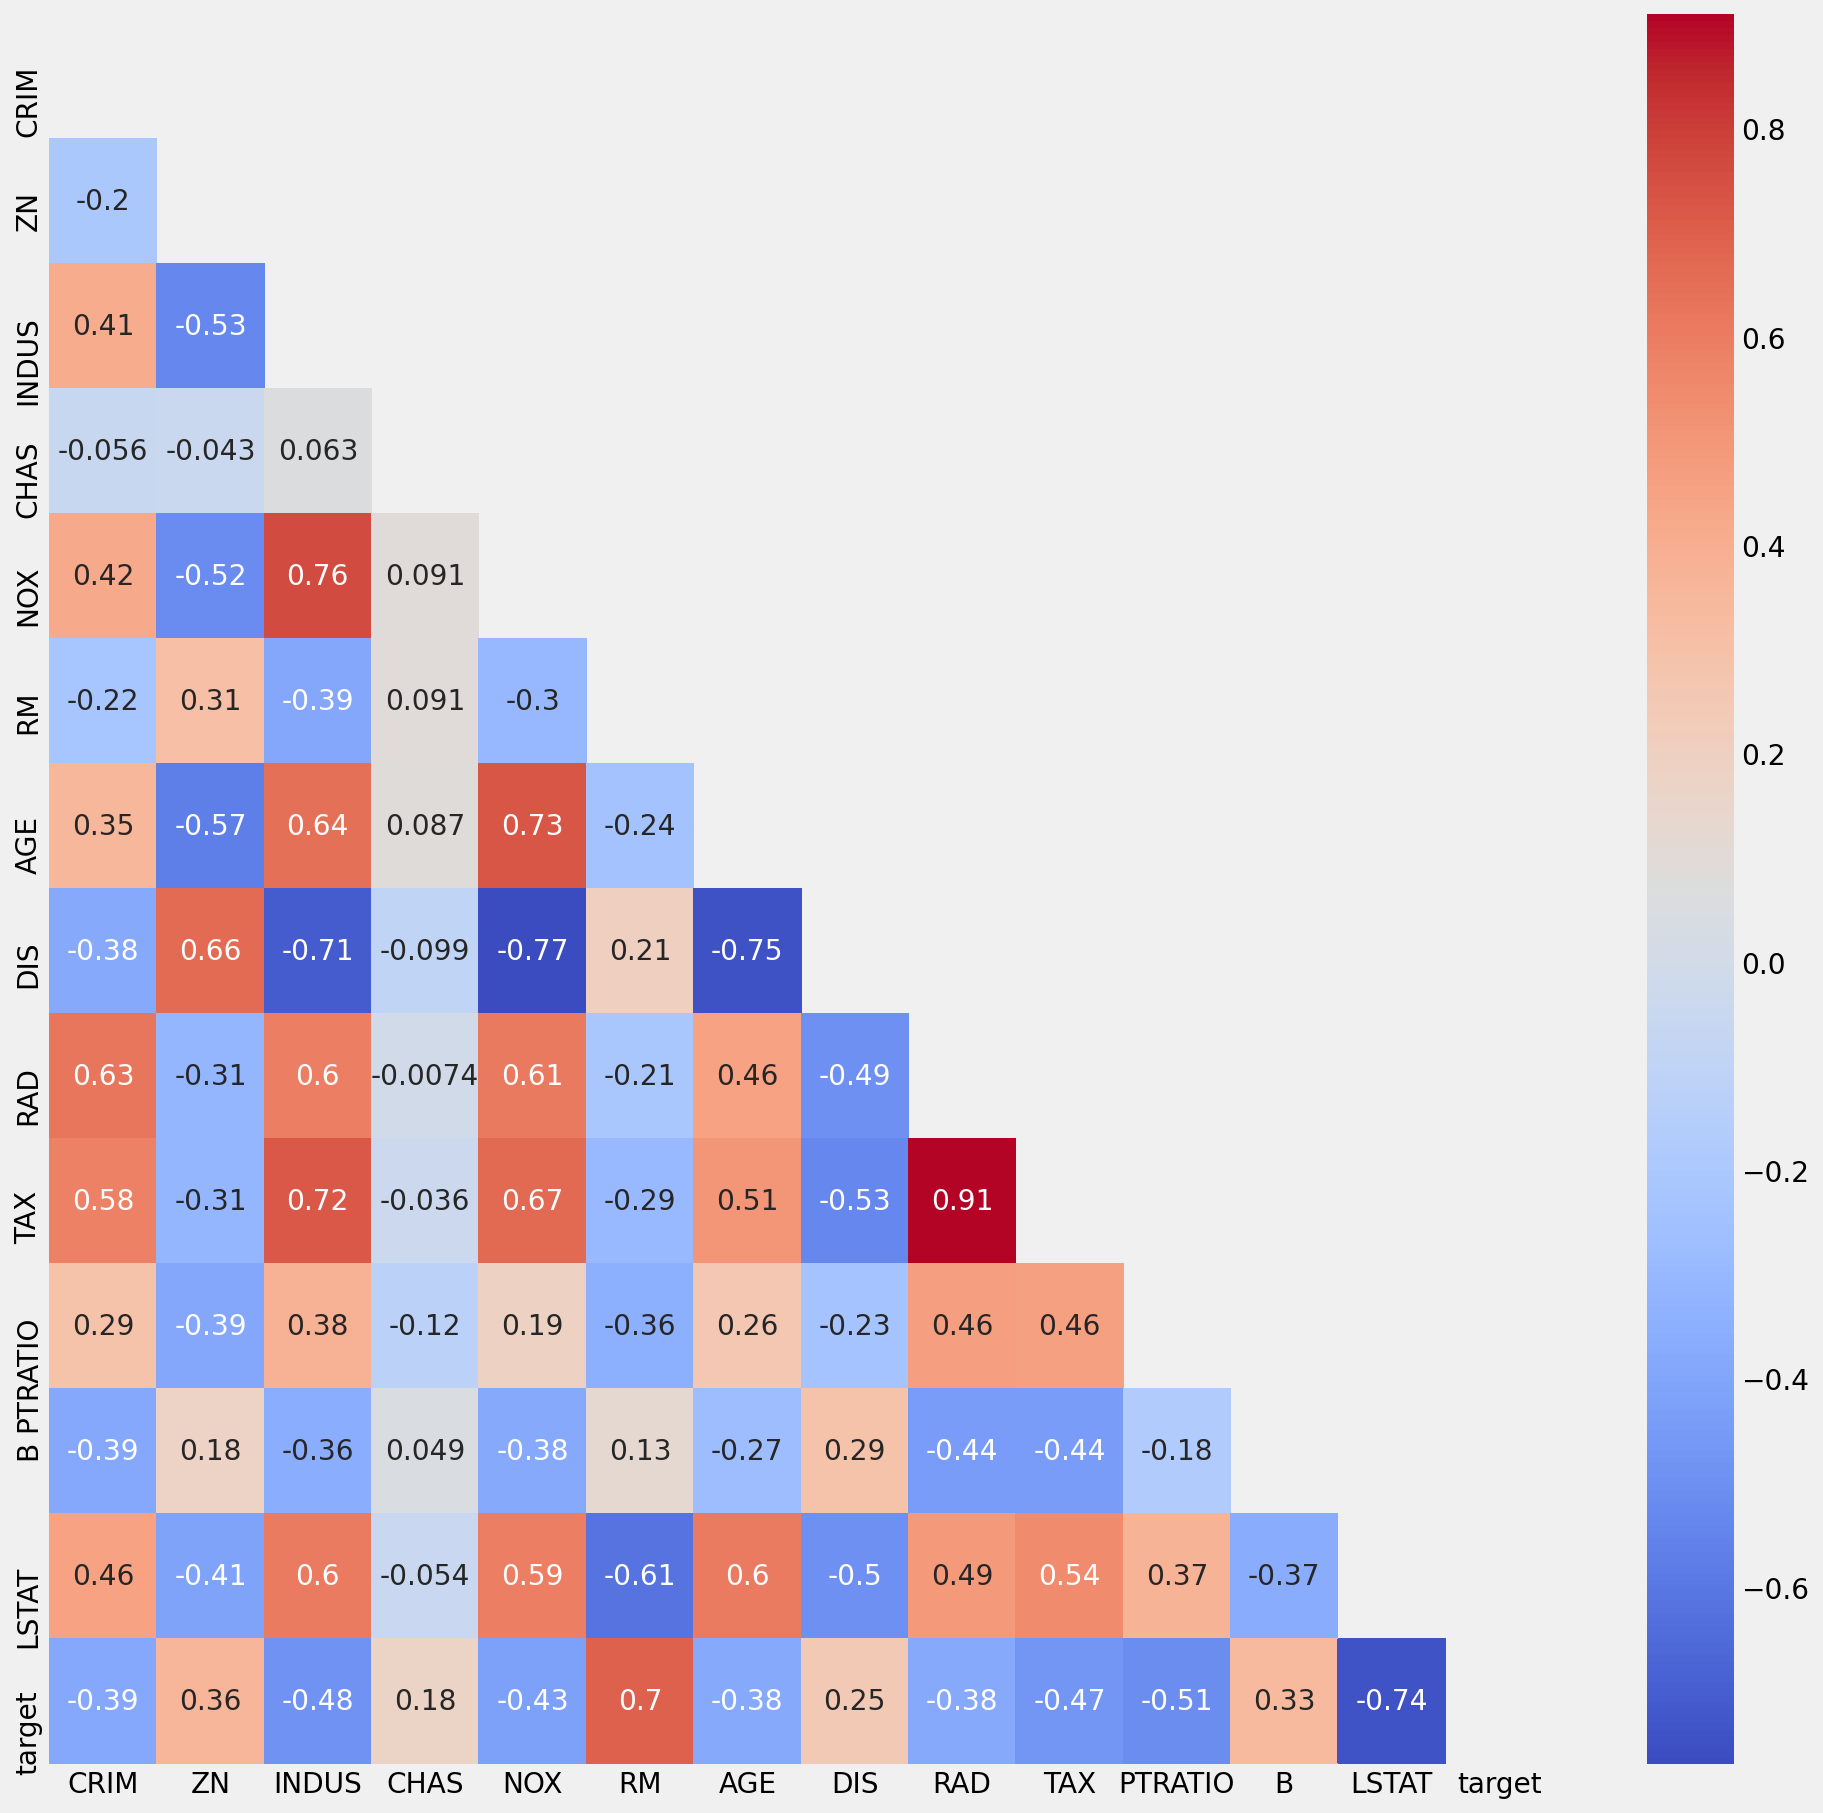

In [457]:
# applying masking techniques from past lessons to see only one half heatmap,
# below diagonal capturing a col's correlation against itself
plt.figure(figsize=(15,15))
corr = combined.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap='coolwarm'); # 'coolwarm' colormap is easier to read in my opinion

In [458]:
combined.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [459]:
#rank and select 4 highest absolute correlation value
combined.corr()['target'].abs().sort_values(ascending=False)

target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

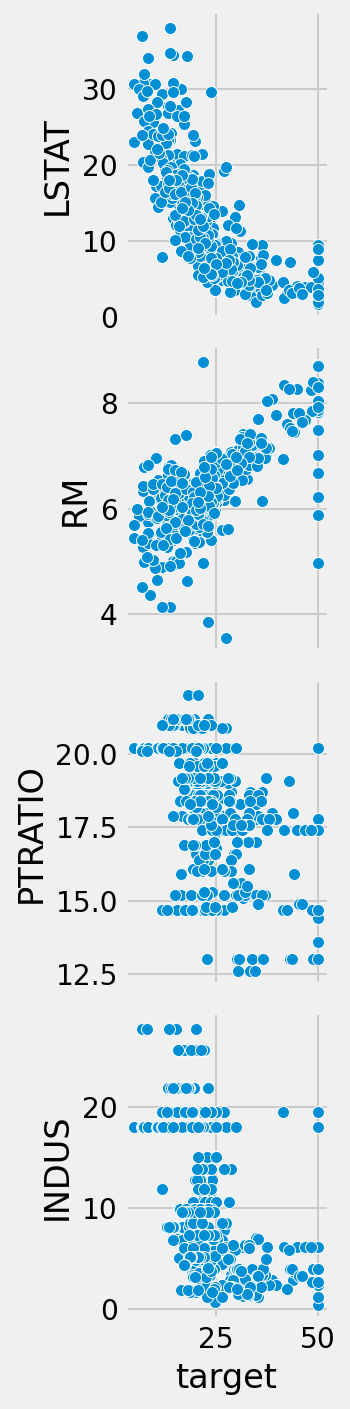

In [460]:
sns.pairplot(combined,x_vars=['target'],y_vars=['LSTAT','RM','PTRATIO','INDUS'])

In [461]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X[['LSTAT','RM','PTRATIO','INDUS']], y, random_state=2, train_size=0.5, test_size=0.5)

In [463]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)# the same as doing ss.fit(X_train), then X_train=ss.transform(X_train)
X_test = ss.transform(X_test)

In [464]:
lr = LinearRegression()

In [465]:
lasso = LassoCV(n_alphas=200)

In [466]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [467]:
# cross_val_score: Evaluates a score by cross-validation. number of folds is given in cv (default=5)
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)

print(lr_scores) # to show r^2 from each of the 3 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.43825805 0.70281114 0.69289323]


0.611320804182419

In [468]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6117936776608441

In [469]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.612669085061813

In [470]:
lasso.fit(X_train, y_train) # fitting lassocv instantiated model

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [471]:
lasso.score(X_train, y_train) # scoring fit model on training set

0.6409846740098801

In [472]:
lasso.score(X_test, y_test) # scoring fit model on testing set

0.6791745052906009

In [473]:
lasso_scores.mean() # recapping cross-validation score from above (cv=3)

0.6117936776608441

In [474]:
y_pred = lasso.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) # comparing model predictions vs true observations

0.6791745052906009

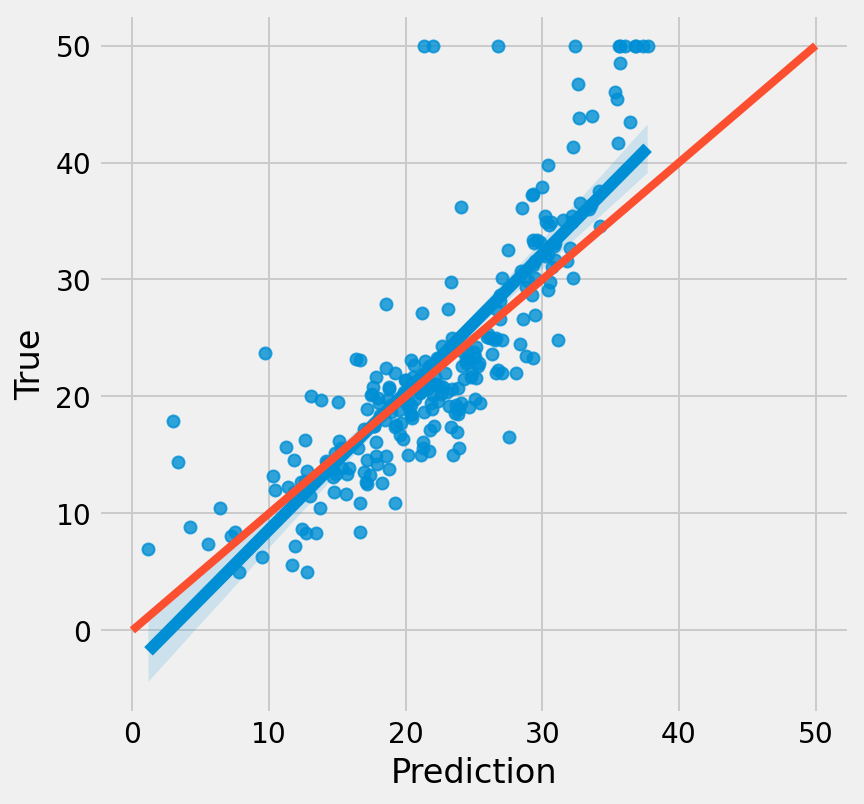

In [475]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x=y_pred,y=y_test)
plt.plot(np.linspace(0,50,100),np.linspace(0,50,100))
plt.xlabel('Prediction')
plt.ylabel('True');

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

R2 score ranking:
1. 70-30
2. 50-50
3. 90-10

Score and plot with 70-30 split

In [476]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X[['LSTAT','RM','PTRATIO','INDUS']], y, random_state=2, train_size=0.7, test_size=0.3)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)# the same as doing ss.fit(X_train), then X_train=ss.transform(X_train)
X_test = ss.transform(X_test)
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
# cross_val_score: Evaluates a score by cross-validation. number of folds is given in cv (default=5)
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)

print(lr_scores) # to show r^2 from each of the 3 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.65930212 0.52721059 0.69094143]


0.6258180451697891

In [477]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6244912749220477

In [478]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.6265444639608693

In [479]:
lasso.fit(X_train, y_train) # fitting lassocv instantiated model

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [480]:
lasso.score(X_train, y_train) # scoring fit model on training set

0.6636076166739385

In [481]:
lasso.score(X_test, y_test) # scoring fit model on testing set

0.7090158980134258

In [482]:
lasso_scores.mean() # recapping cross-validation score from above (cv=3)

0.6244912749220477

In [483]:
y_pred = lasso.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) # comparing model predictions vs true observations

0.7090158980134258

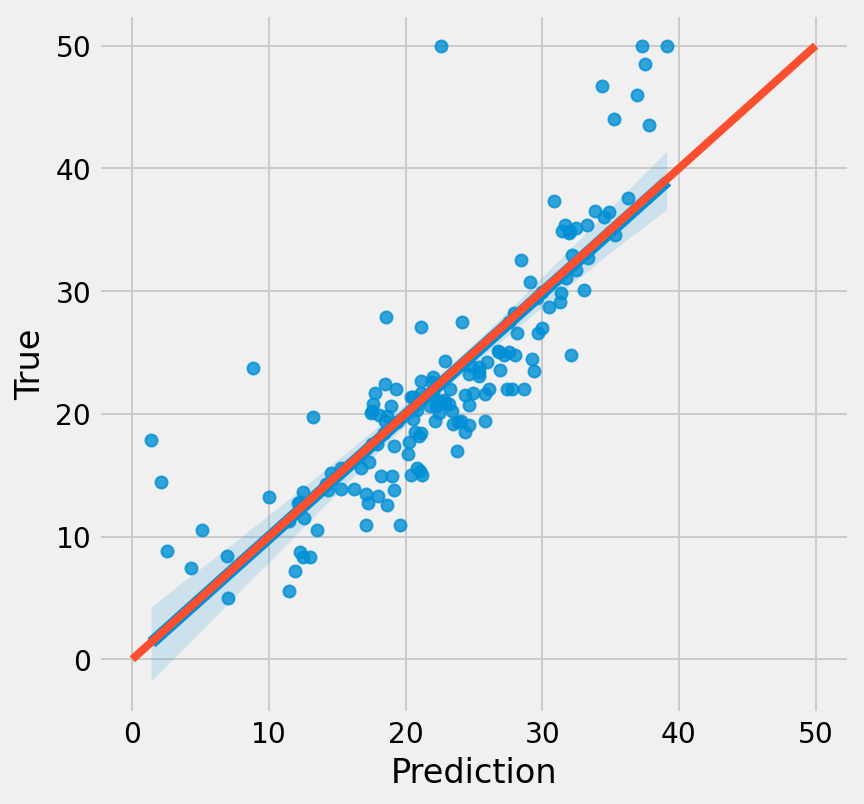

In [484]:
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x=y_pred,y=y_test)
plt.plot(np.linspace(0,50,100),np.linspace(0,50,100))
plt.xlabel('Prediction')
plt.ylabel('True');

Score and plot with 90-10 split

In [485]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X[['LSTAT','RM','PTRATIO','INDUS']], y, random_state=2, train_size=0.9, test_size=0.1)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)# the same as doing ss.fit(X_train), then X_train=ss.transform(X_train)
X_test = ss.transform(X_test)
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
# cross_val_score: Evaluates a score by cross-validation. number of folds is given in cv (default=5)
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)

print(lr_scores) # to show r^2 from each of the 3 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.70556454 0.56310468 0.66747878]


0.6453826656742044

In [486]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6448432405128394

In [487]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.6466975468716575

In [488]:
lasso.fit(X_train, y_train) # fitting lassocv instantiated model

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [489]:
lasso.score(X_train, y_train) # scoring fit model on training set

0.6792379491009518

In [490]:
lasso.score(X_test, y_test) # scoring fit model on testing set

0.6669200712138843

In [491]:
lasso_scores.mean() # recapping cross-validation score from above (cv=3)

0.6448432405128394

In [492]:
y_pred = lasso.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) # comparing model predictions vs true observations

0.6669200712138843

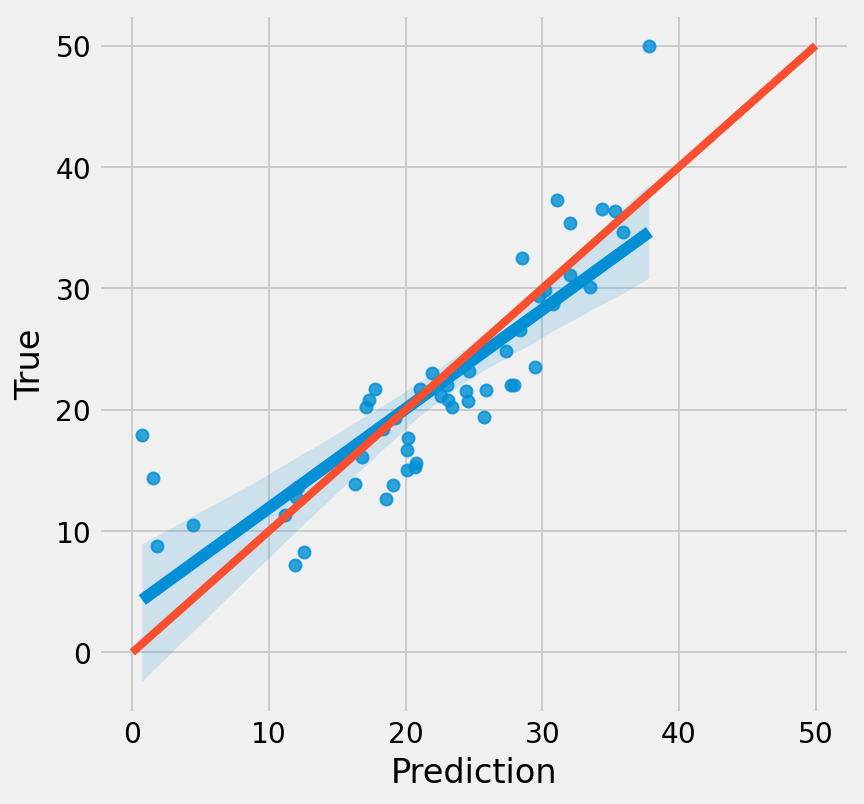

In [493]:
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x=y_pred,y=y_test)
plt.plot(np.linspace(0,50,100),np.linspace(0,50,100))
plt.xlabel('Prediction')
plt.ylabel('True');

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal?
Ans: 7
- How do your scores change?
Ans: Oscillates. See plot below 
- What is the variance of scores like?
Ans: 3.865544573184383e-05
- Try out different folds to get a sense of how this impacts your score.
Ans: it fluctuates with a downward trend.

In [494]:
# A:
# step1: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X[['LSTAT','RM','PTRATIO','INDUS']], y, random_state=2, train_size=0.7, test_size=0.3)
print(len(X_train), len(X_test))

354 152


In [495]:
# step2: Instantiate/Fit Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [496]:
# step3: Train Score
lr.score(X_train, y_train)

0.6651092784594095

In [497]:
# step4: Test Score
lr.score(X_test, y_test)

0.7059686401172409

In [498]:
# step5: Cross Val Score
i=0
score=pd.DataFrame()
score['k']=list(range(0,6))
score['score']=list(np.arange(0,6.0,1))
for cv in range(5,11):
    score['k'][i]=cv
    score['score'][i]=cross_val_score(lr, X_train, y_train, cv=cv).mean()
    i+=1
score

<ipython-input-498-9876d60c63e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['k'][i]=cv
<ipython-input-498-9876d60c63e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['score'][i]=cross_val_score(lr, X_train, y_train, cv=cv).mean()
<ipython-input-498-9876d60c63e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['k'][i]=cv
<ipython-input-498-9876d60c63e1>:8: SettingWithCopyWarning: 
A value is trying to be set 

,k,score
0,5,0.623634
1,6,0.637292
2,7,0.637402
3,8,0.626075
4,9,0.628529
5,10,0.636479


In [499]:
# optimal cv
score[score['score']==max(score['score'])]

,k,score
2,7,0.637402


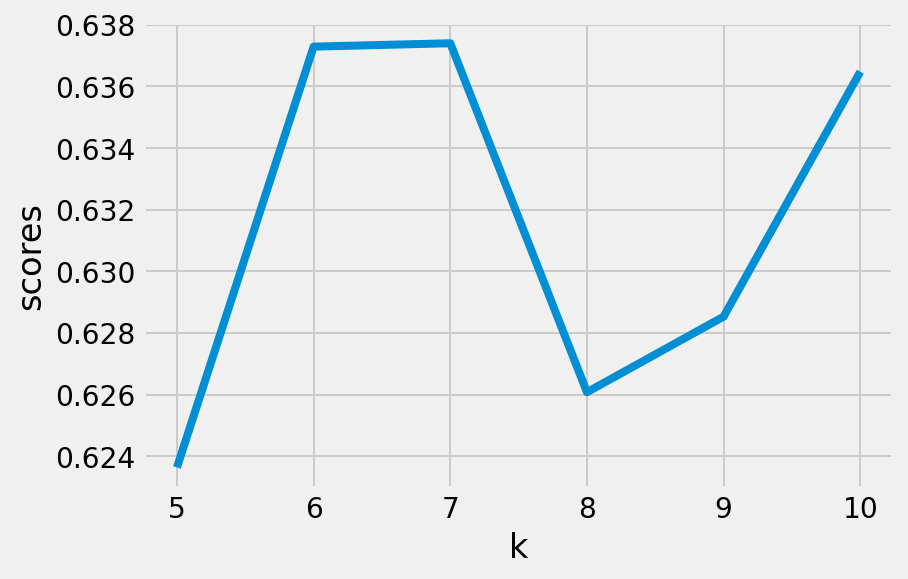

In [500]:
plt.plot(score['k'],score['score'])
plt.xlabel('k')
plt.ylabel('scores');

In [501]:
import statistics as stat
stat.variance(score['score'])

3.865544573184383e-05

<ipython-input-502-ac49cdcd3411>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['k'][i]=cv
<ipython-input-502-ac49cdcd3411>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['score'][i]=cross_val_score(lr, X_train, y_train, cv=cv).mean()
<ipython-input-502-ac49cdcd3411>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score['k'][i]=cv
<ipython-input-502-ac49cdcd3411>:7: SettingWithCopyWarning: 
A value is trying to be set 

0.003939770550855644

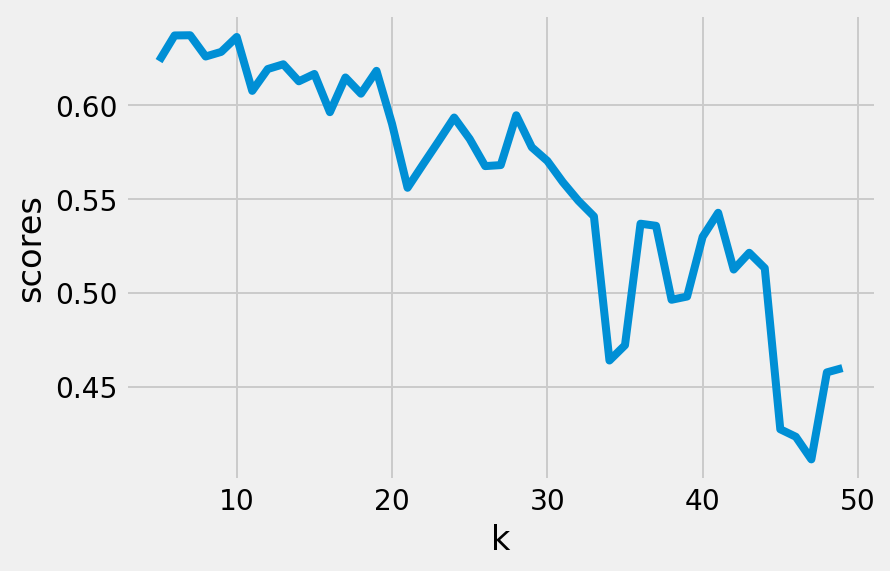

In [502]:
i=0
score=pd.DataFrame()
score['k']=list(range(0,45))
score['score']=list(np.arange(0.0,45.0,1))
for cv in range(5,50):
    score['k'][i]=cv
    score['score'][i]=cross_val_score(lr, X_train, y_train, cv=cv).mean()
    i+=1
plt.plot(score['k'],score['score'])
plt.xlabel('k')
plt.ylabel('scores');
stat.variance(score['score'])

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [8]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [9]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [10]:
import patsy

# A: